In [45]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que: 
- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

In [46]:
df = pd.read_pickle("../datos/possum_standar.pkl")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   case      101 non-null    int64   
 1   site      101 non-null    category
 2   Pop       101 non-null    object  
 3   sex       101 non-null    object  
 4   age       101 non-null    float64 
 5   hdlngth   101 non-null    float64 
 6   skullw    101 non-null    float64 
 7   totlngth  101 non-null    float64 
 8   taill     101 non-null    float64 
 9   footlgth  101 non-null    float64 
 10  earconch  101 non-null    float64 
 11  eye       101 non-null    float64 
 12  chest     101 non-null    float64 
 13  belly     101 non-null    float64 
dtypes: category(1), float64(10), int64(1), object(2)
memory usage: 10.5+ KB


In [48]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

Regresión lineal simple

In [49]:
X = df['skullw'].values.reshape(-1,1)
y = df["totlngth"]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
lr = LinearRegression(n_jobs=-1)

In [52]:
lr.fit(x_train, y_train) 

LinearRegression(n_jobs=-1)

In [53]:
y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) 

In [54]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df = pd.DataFrame({'Real': y_test, 'Predicted': y_predict_test, 'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head() 

,Real,Predicted,Set
89,82.0,84.994071,Train
26,85.0,85.359063,Train
42,81.0,86.381042,Train
70,83.0,83.534101,Train
15,86.0,86.454040,Train


In [55]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head() 

,Real,Predicted,Set,residuos
89,82.0,84.994071,Train,-2.994071
26,85.0,85.359063,Train,-0.359063
42,81.0,86.381042,Train,-5.381042
70,83.0,83.534101,Train,-0.534101
15,86.0,86.454040,Train,-0.454040


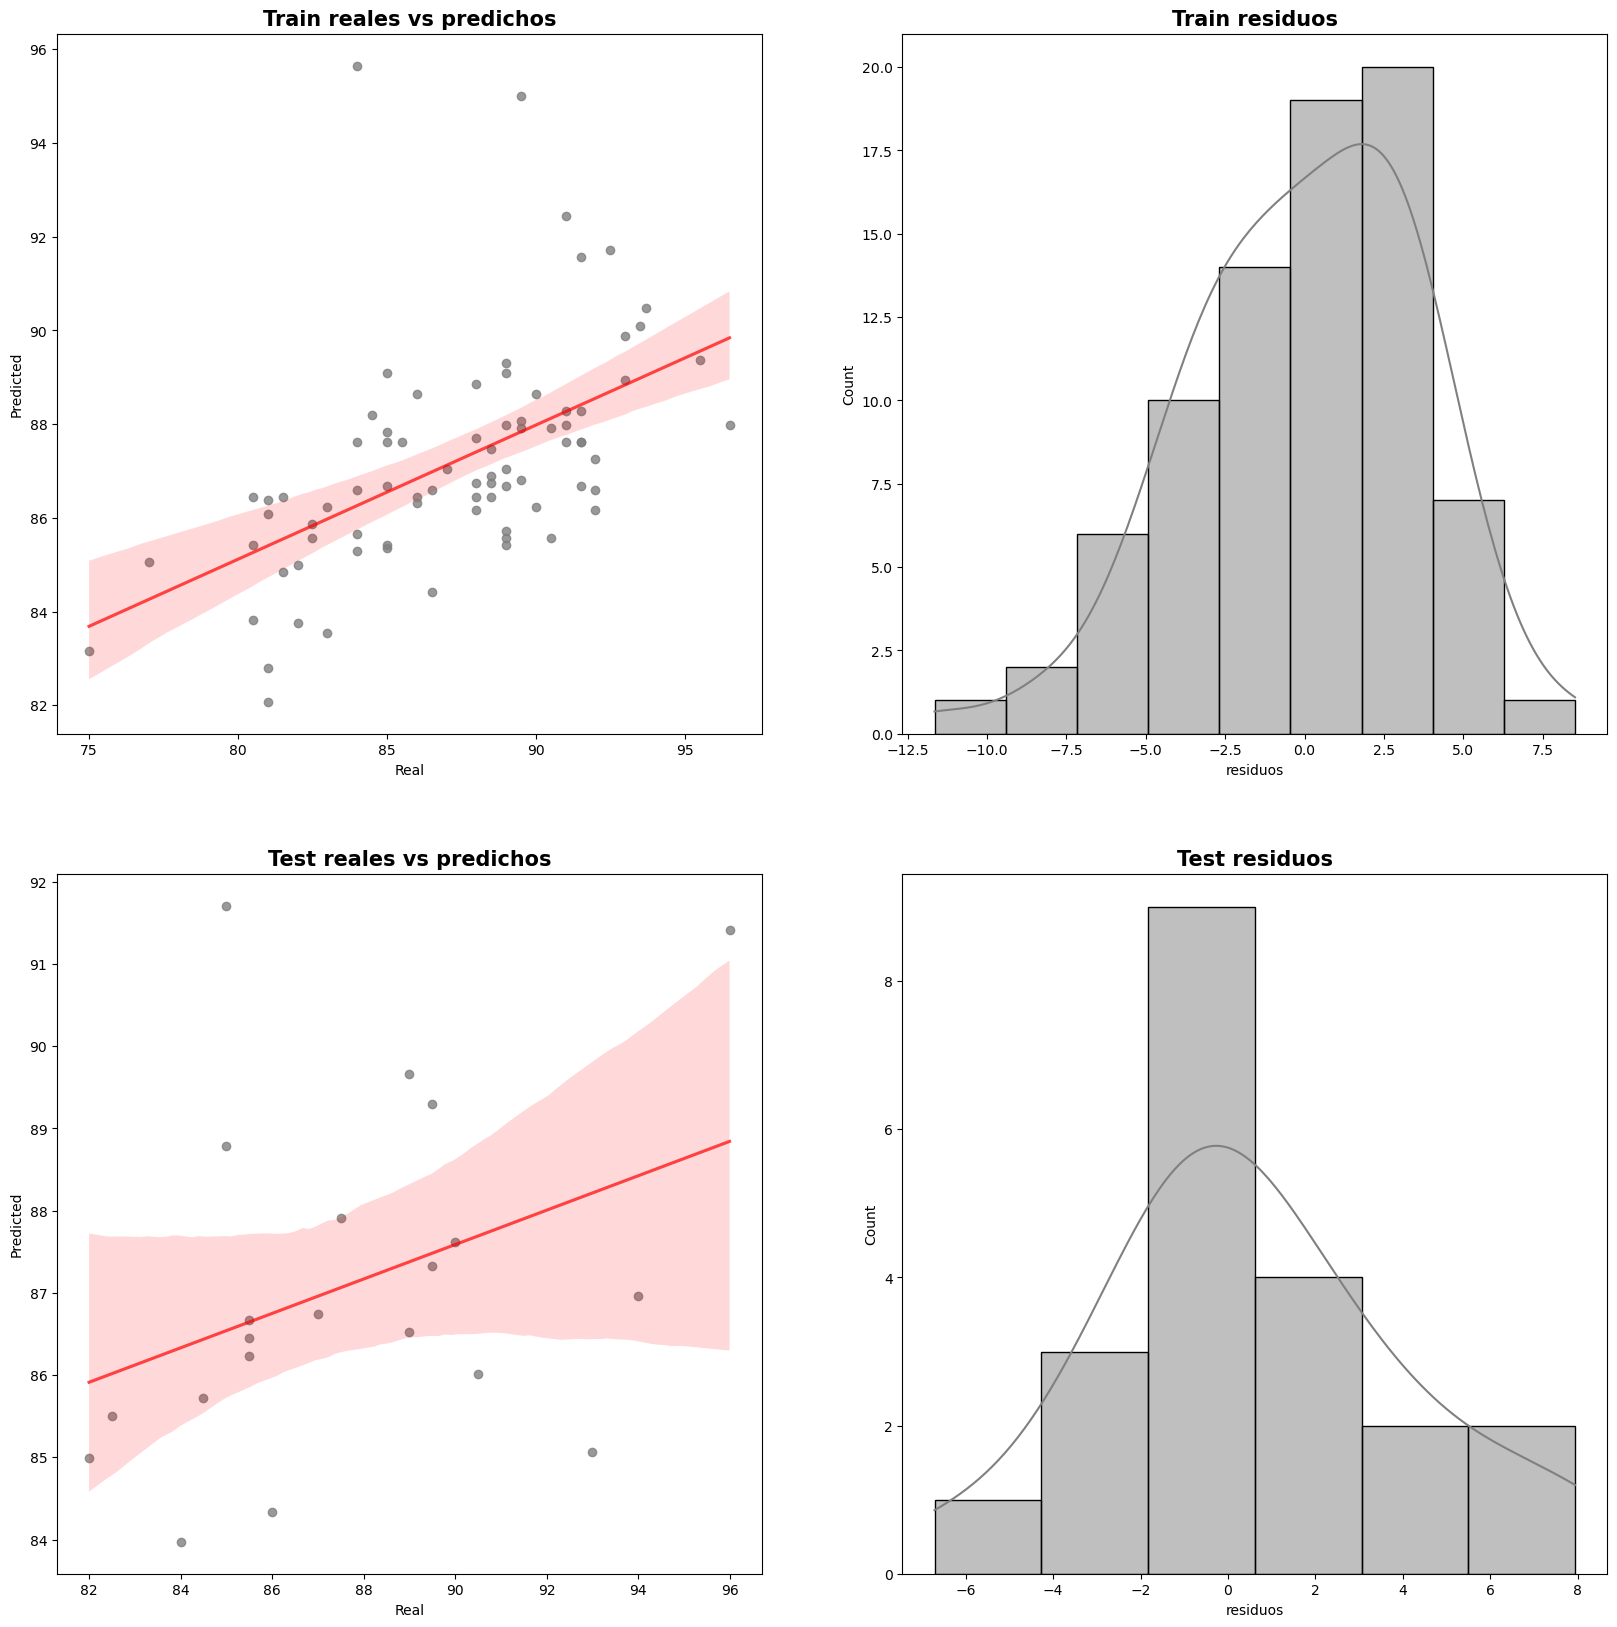

In [56]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
x = "Real", 
y = "Predicted", 
ax = ax[0,0], 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
x = "Real",
y = "Predicted", 
color = "gray",
line_kws = {"color": "red", "alpha": 0.7 }, 
ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
x="residuos",
color ="grey",
kde=True, 
ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
x="residuos",
color = "grey",
kde=True, 
ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold"); 

Regresión lineal múltiple

In [57]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [58]:
X2 = df.drop(['case', 'site', 'Pop', 'sex', 'totlngth'], axis= 1)
y2 = df['totlngth']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [60]:
lr = LinearRegression(n_jobs=-1)

In [61]:
lr.fit(x_train, y_train) 

LinearRegression(n_jobs=-1)

In [62]:
y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) 

In [63]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df = pd.DataFrame({'Real': y_test, 'Predicted': y_predict_test, 'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head() 

,Real,Predicted,Set
89,82.0,84.423476,Train
26,85.0,83.520348,Train
42,81.0,84.313851,Train
70,83.0,84.347808,Train
15,86.0,86.071434,Train


In [64]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head() 

,Real,Predicted,Set,residuos
89,82.0,84.423476,Train,-2.423476
26,85.0,83.520348,Train,1.479652
42,81.0,84.313851,Train,-3.313851
70,83.0,84.347808,Train,-1.347808
15,86.0,86.071434,Train,-0.071434


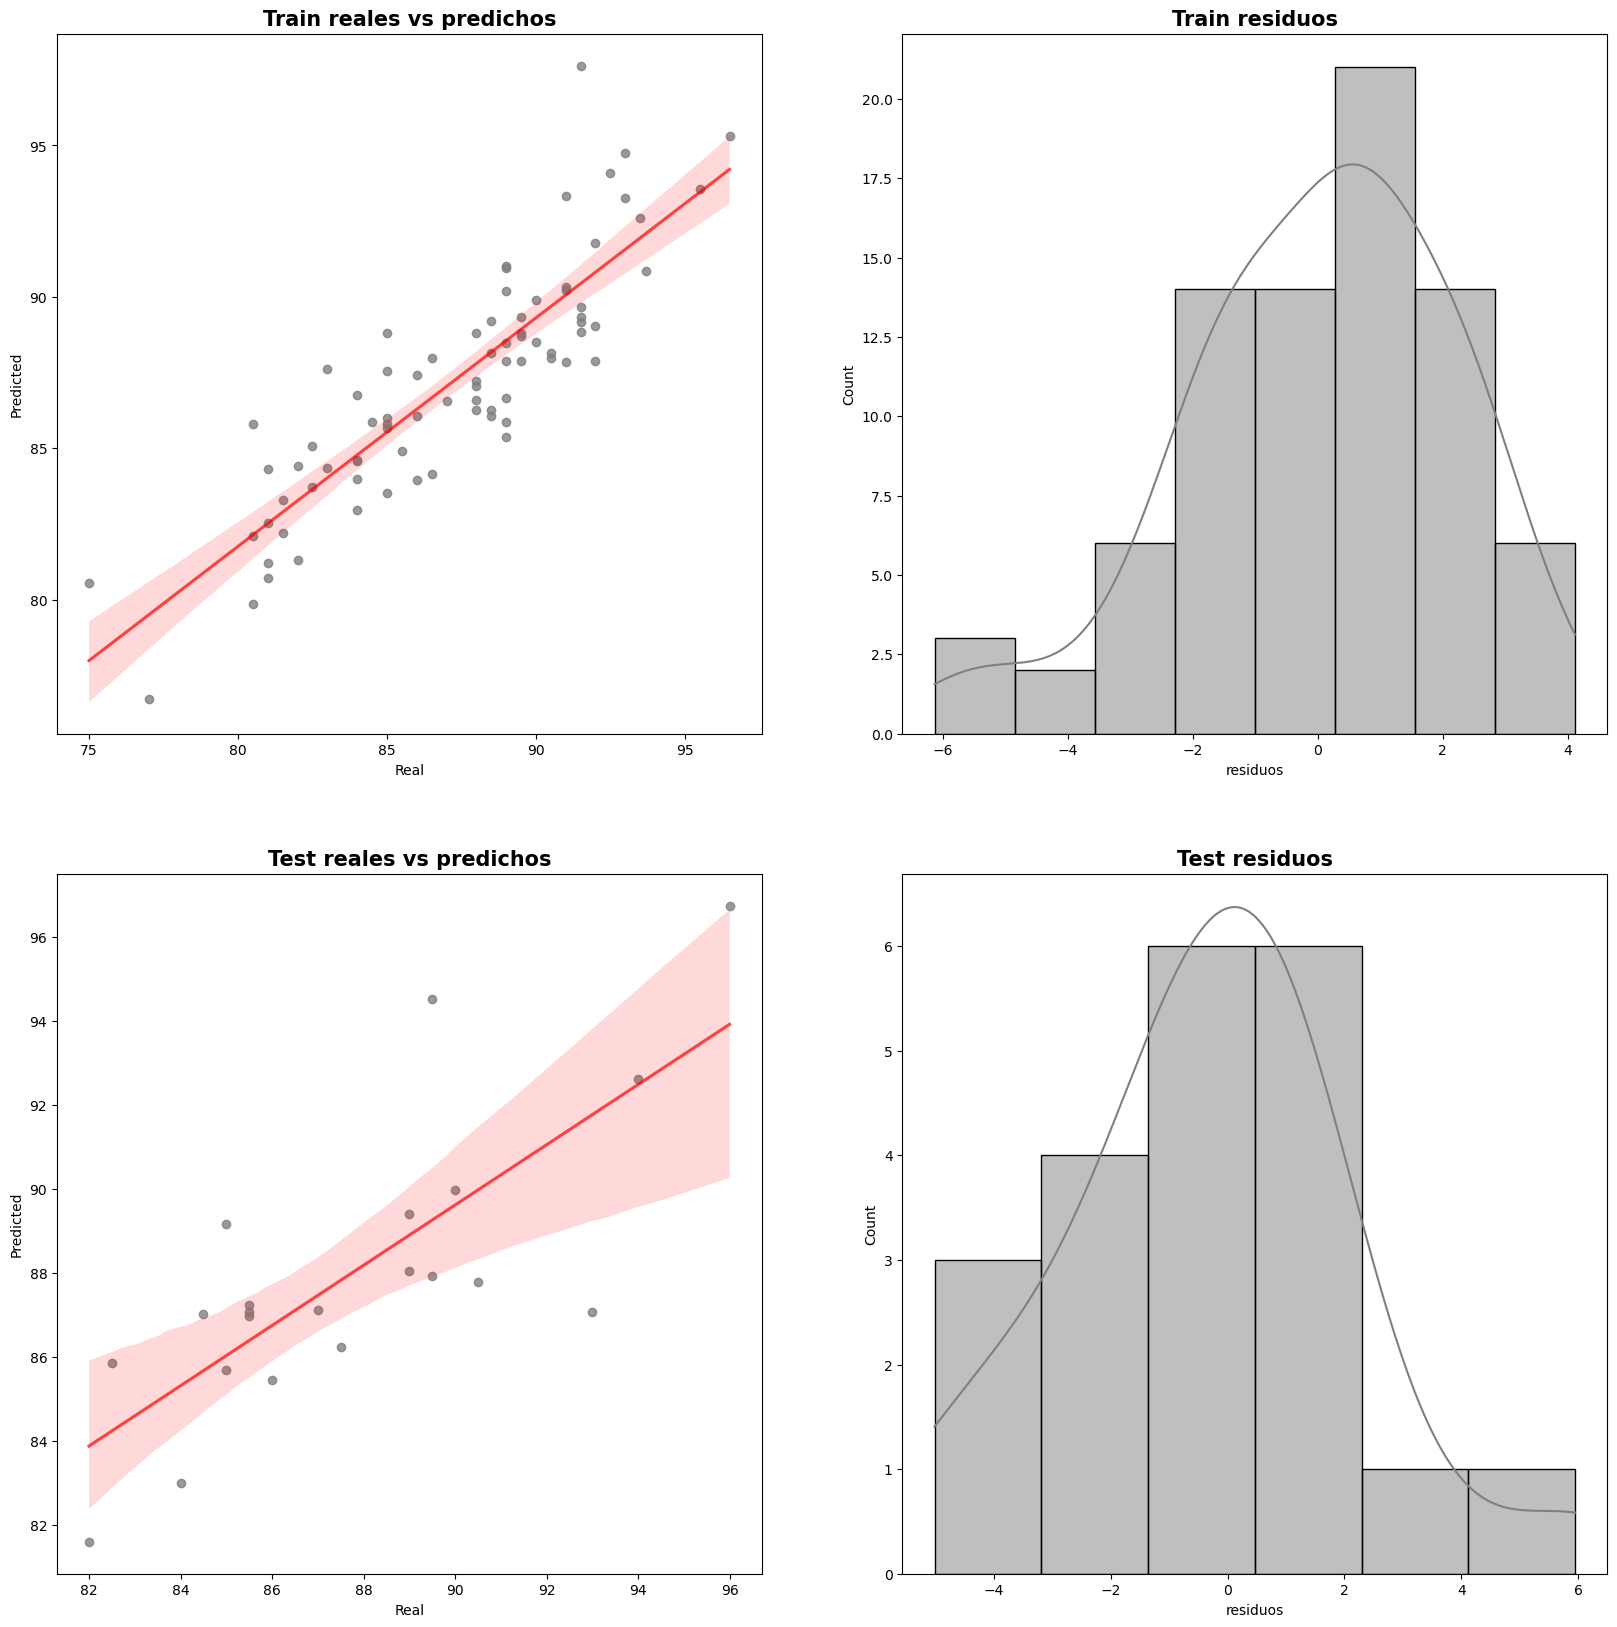

In [65]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
x = "Real", 
y = "Predicted", 
ax = ax[0,0], 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
x = "Real",
y = "Predicted", 
color = "gray",
line_kws = {"color": "red", "alpha": 0.7 }, 
ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
x="residuos",
color ="grey",
kde=True, 
ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
x="residuos",
color = "grey",
kde=True, 
ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold"); 

Cross validation

RL simple

In [66]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
estimator = LinearRegression(), # que algoritmo queremos usar para ajustar el modelo
X = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
y = y, # cual es nuestra variable y
scoring = 'neg_root_mean_squared_error', # que métrica queremos calcular
cv = 10 # número de veces que queremos hacer la validación
)

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-3.83148455 -4.52247532 -3.10681953 -5.351225   -4.16605704 -2.9772585
 -2.01051378 -2.99403039 -2.89045208 -5.02519038]
Média métricas de validación cruzada: -3.687550656736952


In [68]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
estimator = LinearRegression(),
X = X,
y = y,
scoring = ('r2', 'neg_root_mean_squared_error'),
cv = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores 

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.001630,0.001001,-1.703673,-3.831485
1,0.004524,0.000813,-1.364484,-4.522475
2,0.000968,0.000762,-0.042087,-3.106820
3,0.000965,0.000700,0.008806,-5.351225
4,0.001286,0.000853,-0.036181,-4.166057
5,0.000995,0.000822,-0.092697,-2.977258
6,0.001004,0.000786,0.548488,-2.010514
7,0.001126,0.001060,0.026951,-2.994030
8,0.001164,0.000732,0.264064,-2.890452
9,0.001071,0.000796,-2.295600,-5.025190


In [69]:
print(f'la media para el r2 es {round(cv_scores["test_r2"].mean(), 2)}')
print(f'la media para el RMSE es {abs(round(cv_scores["test_neg_root_mean_squared_error"].mean(), 2))}') 

la media para el r2 es -0.47
la media para el RMSE es 3.69


RL múltiple

In [71]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
estimator = LinearRegression(), # que algoritmo queremos usar para ajustar el modelo
X = X2, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
y= y2, # cual es nuestra variable y
scoring = 'neg_root_mean_squared_error', # que métrica queremos calcular
cv = 10 # número de veces que queremos hacer la validación
)

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-2.14933062 -2.31972711 -2.52635743 -3.79414385 -3.14770223 -1.87070176
 -1.22800677 -1.00818373 -2.35762575 -2.8088991 ]
Média métricas de validación cruzada: -2.32106783494907


In [72]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
estimator = LinearRegression(),
X = X2,
y = y2,
scoring = ('r2', 'neg_root_mean_squared_error'),
cv = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores 

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.004972,0.003130,0.149202,-2.149331
1,0.002530,0.002193,0.377904,-2.319727
2,0.003450,0.003501,0.310933,-2.526357
3,0.002971,0.002707,0.501712,-3.794144
4,0.003959,0.002558,0.408476,-3.147702
5,0.003442,0.002002,0.568604,-1.870702
6,0.003931,0.002549,0.831555,-1.228007
7,0.006031,0.002139,0.889668,-1.008184
8,0.003221,0.003484,0.510381,-2.357626
9,0.002387,0.001572,-0.029679,-2.808899


In [73]:
print(f'la media para el r2 es {round(cv_scores["test_r2"].mean(), 2)}')
print(f'la media para el RMSE es {abs(round(cv_scores["test_neg_root_mean_squared_error"].mean(), 2))}')

la media para el r2 es 0.45
la media para el RMSE es 2.32
